In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import umap
import nltk;
import spacy
import string

import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(10,8)})

np.random.seed(42)
%config Completer.use_jedi = False
pd.set_option('display.max_columns', 30)
# pd.set_option('display.max_rows', 100)

nlp = spacy.load("en_core_web_sm")

In [2]:
df = pd.read_csv('octopus_energy_tweets.csv')
df.rename(columns={"tweet":"comments"},inplace=True)
df.head()

,Unnamed: 0,comments
0,0,@octopus_energy I think your wheel is broken 🤣...
1,1,Our 3 stories of the week...\n\nNo 3: Kind cou...
2,2,@adamtranter Glad I jumped ship ages ago. Hope...
3,3,@newelland @octopus_energy I get that HRM is u...
4,4,@newelland @octopus_energy I've also wondered ...


In [3]:
df.comments[286]

'@TrevorWAllman @HibbsA @SpeakSarahSpeak @octopus_energy Doesn\'t that conflict with your "burn everything" ethos for electricity generation? I\'m sure you can find yourself a dirtier tariff, but it won\'t necessarily be cheaper.'

In [4]:
df.comments.replace("\S*@\S*" , "", regex=True, inplace = True)
df.comments.replace("\S*#\S*" , "", regex=True, inplace = True)
df.comments.replace("\S*http\S*" , "", regex=True, inplace = True)
df.comments.replace("_" , " ", regex=True, inplace = True)
df.comments.replace("^" , " ", regex=True, inplace = True)
df.comments.replace("\n" , " ", regex=True, inplace = True)

In [5]:
df.comments[286]

'     Doesn\'t that conflict with your "burn everything" ethos for electricity generation? I\'m sure you can find yourself a dirtier tariff, but it won\'t necessarily be cheaper.'

In [6]:
for i in string.punctuation:
    try:
        df.comments.replace(f"\{i}" , "", regex=True, inplace = True)
    except: pass

In [7]:
df.comments[286]

'     Doesnt that conflict with your burn everything ethos for electricity generation Im sure you can find yourself a dirtier tariff but it wont necessarily be cheaper'

In [8]:
junk_words = "ve xx tqvm yessssssssssit youuuuuu nan nt citi kashif a very were yet than through via here rishisunak more much getting go going ive dont able when which who year barclays hsbcin amp like an no any since after banking im there out how starlingbank starling one only again over other then am may some do cant about banks would could its even their after has them get got within now all just if what or at had hsbcukbusiness up by into will an was our us so been hsbcuk co om ke ha gone your we can from as but to the hsbc and of you for are have they is my hsbc_uk with it in on this ðÿ be not bank me that"
junk_words_list = junk_words.split(" ")

In [9]:
def remove_unicode(text):

    try:
        text = text.encode("latin_1").decode("raw_unicode_escape").encode('utf-16', 'surrogatepass').decode('utf-16')
    except:
        text = text

    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", re.UNICODE)

    text = re.sub(emoji_pattern, '', str(text))
    text = ''.join(text.split('\\n')) # to remove uncompiled \n
    text = re.sub('\n', '', text)     # to remove compiled \n

    return text

In [10]:
def word_root(text):
    list_data3=[]
    text = remove_unicode(text)
    doc = nlp(text)
    for token in doc:
        if token.text.isalpha():
            lemma = token.lemma_
            list_data3.append(lemma)
        else:pass
    return " ".join(list_data3)
df.comments = df.comments.apply(lambda x: word_root(str(x).lower()))  

In [11]:
df.comments.value_counts()

not true though octopus have hr business partner hr admin recruitment and lampd and be advertise on their website for a talent acquisition sourcer and learning and development specialist so this be rubbish he s pretend to be a disruptor    2
just switch to you from bulb but for whatever reason our smart meter be reflect useage from gas only electric why be this a faulty meter or do we need a smart meter from yourself                                                              1
I mean it do nt feel like we ve get off to the good of start but I m up for a look can you send I detail of podcast thx                                                                                                                         1
I an customer I not surprised that have take this route brilliant company to deal with that ooze innovation too                                                                                                                                 1
there be a far saving not repres

In [12]:
df.replace('nan', np.nan, inplace = True)
df.replace('', np.nan, inplace = True)
df.replace('do', np.nan, inplace = True)
df = df.dropna()

In [13]:
df.comments.value_counts()

not true though octopus have hr business partner hr admin recruitment and lampd and be advertise on their website for a talent acquisition sourcer and learning and development specialist so this be rubbish he s pretend to be a disruptor    2
just switch to you from bulb but for whatever reason our smart meter be reflect useage from gas only electric why be this a faulty meter or do we need a smart meter from yourself                                                              1
thank you for your speedy response I m on the phone to my lovely lady now so I ve pass it across I hope you can help she when she call                                                                                                          1
I an customer I not surprised that have take this route brilliant company to deal with that ooze innovation too                                                                                                                                 1
there be a far saving not repres

In [14]:
list_data = df.comments.unique().tolist()

In [15]:
len(list_data)

498

In [16]:
from sentence_transformers import SentenceTransformer

In [17]:
# distilbert-base-nli-mean-tokens
# paraphrase-distilroberta-base-v1
# roberta-large-nli-stsb-mean-tokens
#allenai-specter


In [18]:
model=SentenceTransformer('xlm-r-distilroberta-base-paraphrase-v1')
embeddings = model.encode(list_data, show_progress_bar=True)

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

In [19]:
best_model = umap.UMAP(n_components=5).fit_transform(embeddings)

#n_neighbors=10, min_dist=0.0, 

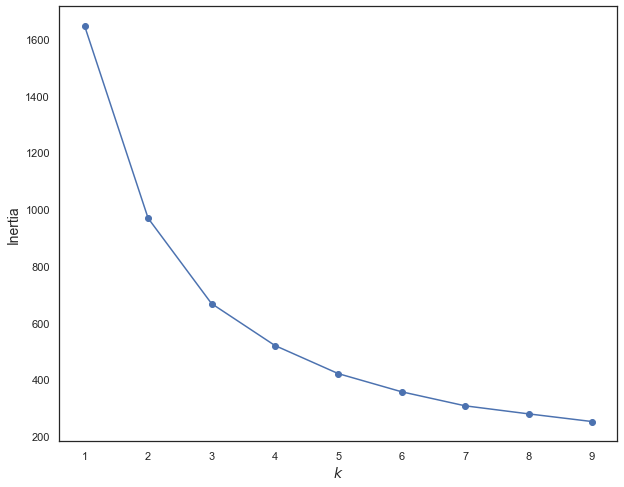

In [20]:
#inertia

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(best_model)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [21]:
# from nltk.cluster import KMeansClusterer,euclidean_distance
# clusterer =KMeansClusterer(6,euclidean_distance)
# cluster=np.array(clusterer.cluster(best_model,True))

In [31]:
cluster = KMeans(n_clusters=4, init="k-means++").fit_predict(best_model)

In [32]:
def plot(cluster = cluster):    

    clustered = (cluster >= 0)
    reduced_dim = umap.UMAP(n_components=2).fit_transform(embeddings)



    unique, counts = np.unique(cluster, return_counts=True)
    print(dict(zip(unique, counts)))

    plt.scatter(reduced_dim[~clustered, 0],
                reduced_dim[~clustered, 1],
                c=(0.5,0.5,0.5),
                # s=1,
                alpha=0.5
                )
    plt.scatter(reduced_dim[clustered, 0],
                reduced_dim[clustered, 1],
                c=cluster[clustered],
                # s=1,
                cmap='Accent')
    plt.show()

{0: 132, 1: 124, 2: 125, 3: 117}


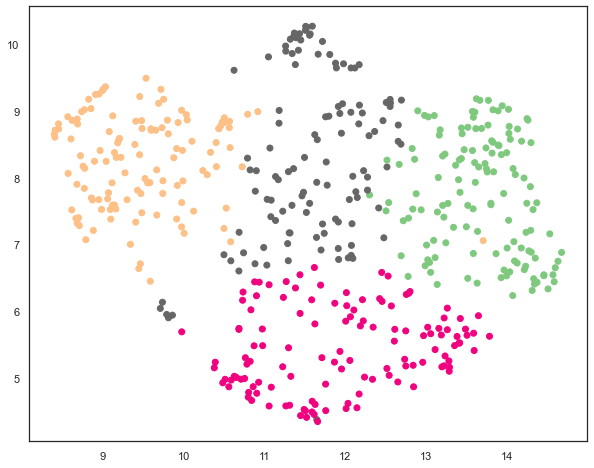

In [34]:
plot()

In [35]:
len(cluster)

498

In [36]:
docs = pd.DataFrame(list_data,columns=["comments"])
docs["cluster"] = cluster
labeled_docs = docs.groupby(["cluster"], as_index=False).agg({"comments": " ".join})
labeled_docs.comments.replace(r"\S*octo\S*", "octopus", regex=True, inplace = True)
labeled_docs.comments.replace(r"\S*octu\S*", "octopus", regex=True, inplace = True)
labeled_docs.comments.replace(r"\S*wind\S*", "wind", regex=True, inplace = True)
labeled_docs.comments.replace(r"\S*electric\S*", "electric", regex=True, inplace = True)
labeled_docs.comments.replace(r"\S*utilitia\S*", "utilita", regex=True, inplace = True)
labeled_docs.comments.replace(r"metre", "meter", regex=True, inplace = True)
labeled_docs

,cluster,comments
0,0,can we have a timetable for smart meter roll o...
1,1,I get that hrm be use to exert control over em...
2,2,our story of the week no kind couple help deli...
3,3,I think your wheel be break l it hit and roll ...


In [37]:
from keybert import KeyBERT
array_text = labeled_docs.comments.tolist()
    
kw_extractor = KeyBERT(model=model)
trigram = []
for j in range(len(array_text)):
    keywords = kw_extractor.extract_keywords(array_text[j],top_n=10,keyphrase_ngram_range=(3, 3))
    print(f'\033[1m   Trigram Cluster {j+1}: \033[0m')
    print([word for word in keywords])
    trigram.append([word[0] for word in keywords])

   Trigram Cluster 1: 
[('smart meter rollout', 0.4468), ('forward ban petrol', 0.4276), ('electric amp green', 0.4246), ('ban petrol amp', 0.4209), ('renewable electric amp', 0.419), ('switch renewable uk', 0.3988), ('switch gas electric', 0.3939), ('smart meter install', 0.392), ('plan use electric', 0.3917), ('smart meter instal', 0.3915)]
   Trigram Cluster 2: 
[('process especially company', 0.5164), ('especially company people', 0.4797), ('efficient company tendency', 0.4753), ('company tendency ingrain', 0.47), ('tendency large company', 0.4628), ('wonder company like', 0.4584), ('hr especially employee', 0.4553), ('company like successful', 0.4496), ('work company ve', 0.4491), ('say company hr', 0.4462)]
   Trigram Cluster 3: 
[('day wait response', 0.5266), ('week response email', 0.52), ('day receive reply', 0.5131), ('email send day', 0.513), ('week email response', 0.5029), ('email response min', 0.4963), ('yesterday response email', 0.4795), ('wait week response', 0.4713)

In [38]:
bigram=[]
for j in range(len(array_text)):
    keywords = kw_extractor.extract_keywords(array_text[j],top_n=3,keyphrase_ngram_range=(2, 2))
    print(f'\033[1m   Bigram Cluster {j+1}: \033[0m' )
    print([word for word in keywords])
    bigram.append([word[0] for word in keywords])

   Bigram Cluster 1: 
[('meter rollout', 0.4063), ('amp green', 0.3721), ('renewable electric', 0.3658)]
   Bigram Cluster 2: 
[('especially company', 0.4394), ('company tendency', 0.434), ('company work', 0.4245)]
   Bigram Cluster 3: 
[('hour respond', 0.4551), ('response email', 0.4494), ('email sunday', 0.4421)]
   Bigram Cluster 4: 
[('wheel break', 0.3441), ('toy brilliant', 0.3), ('great company', 0.2962)]


In [39]:
unigram=[]
for j in range(len(array_text)):
    keywords = kw_extractor.extract_keywords(array_text[j],top_n=10,keyphrase_ngram_range=(1, 1))
    print(f'\033[1m   Unigram Cluster {j+1}: \033[0m' )
    print([word for word in keywords])
    unigram.append([word[0] for word in keywords])

   Unigram Cluster 1: 
[('timetable', 0.2987), ('radio', 0.2883), ('electric', 0.2867), ('diesel', 0.2866), ('battery', 0.2796), ('electronic', 0.2677), ('charger', 0.2663), ('petrol', 0.252), ('green', 0.2513), ('soon', 0.2497)]
   Unigram Cluster 2: 
[('organizational', 0.3713), ('corporate', 0.3687), ('employer', 0.3295), ('organisation', 0.3222), ('management', 0.311), ('employee', 0.3066), ('company', 0.3053), ('employ', 0.3012), ('control', 0.2926), ('workforce', 0.2907)]
   Unigram Cluster 3: 
[('send', 0.3418), ('delivery', 0.3398), ('twitter', 0.3311), ('hourly', 0.3221), ('day', 0.3214), ('message', 0.3188), ('email', 0.3186), ('driver', 0.3181), ('service', 0.3172), ('mail', 0.3134)]
   Unigram Cluster 4: 
[('wonderful', 0.2777), ('wheel', 0.2776), ('unbelievably', 0.269), ('fix', 0.2549), ('woolly', 0.2526), ('wish', 0.25), ('amazing', 0.2478), ('hope', 0.2451), ('superb', 0.2409), ('excellent', 0.2389)]


In [40]:
for i in range(4):
    clusterer=[]
    print(f'\033[1m   Cluster {i+1}: \033[0m')
    clusterer.append(trigram[i][0])
    
    wor=[]
    for w in trigram[i][1].split(" "):
        wor.append(w in trigram[i][0])
    if all(wor):
        clusterer.append(trigram[i][2])
    else:
        clusterer.append(trigram[i][1])
        
    for m, n in zip(trigram[i][0:2]*5,bigram[i][0:10]):
        first,second = n.split(" ")
        if not(first in m and second in m):
            clusterer.append(n)
    clusterer = clusterer[:5]
    [clusterer.append(j) for j in unigram[i]]
    print(clusterer)
    

   Cluster 1: 
['smart meter rollout', 'forward ban petrol', 'amp green', 'renewable electric', 'timetable', 'radio', 'electric', 'diesel', 'battery', 'electronic', 'charger', 'petrol', 'green', 'soon']
   Cluster 2: 
['process especially company', 'especially company people', 'company tendency', 'company work', 'organizational', 'corporate', 'employer', 'organisation', 'management', 'employee', 'company', 'employ', 'control', 'workforce']
   Cluster 3: 
['day wait response', 'week response email', 'hour respond', 'email sunday', 'send', 'delivery', 'twitter', 'hourly', 'day', 'message', 'email', 'driver', 'service', 'mail']
   Cluster 4: 
['think wheel break', 'great company love', 'toy brilliant', 'great company', 'wonderful', 'wheel', 'unbelievably', 'fix', 'woolly', 'wish', 'amazing', 'hope', 'superb', 'excellent']
